In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import CLIPProcessor, CLIPModel


In [12]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # CLIP expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4815, 0.4578, 0.4082], std=[0.2686, 0.2613, 0.2757])  # CLIP normalization
])


In [36]:
from torch.utils.data import Subset
cifar_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
dataset = Subset(cifar_data, range(32))  # for demonstration purposes
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


Files already downloaded and verified


In [37]:
class_names = cifar_data.classes  # CIFAR-10 class names
text_inputs = processor(text=class_names, return_tensors="pt", padding=True)


In [38]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor([6, 6, 6, 7, 1, 1, 5, 6, 5, 6, 5, 6, 1, 1, 1, 6, 5, 6, 5, 6, 1, 1, 6, 5,
        7, 1, 6, 5, 6, 6, 6, 5])
tensor([9, 2, 0, 7, 3, 4, 6, 1, 8, 2, 5, 3, 6, 9, 1, 2, 3, 7, 4, 9, 6, 9, 2, 9,
        4, 0, 3, 7, 6, 9, 6, 4])


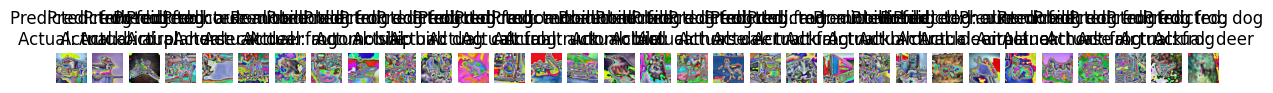

In [39]:
import matplotlib.pyplot as plt

# Forward pass through CLIP
for images, labels in dataloader:
    # Convert images to PIL format for CLIP's processor
    pil_images = [transforms.ToPILImage()(img) for img in images]

    # Process images using CLIP's processor (automatically normalizes them)
    inputs = processor(images=pil_images, return_tensors="pt")

    outputs = model(**inputs, **text_inputs)
    logits_per_image = outputs.logits_per_image  # Image-to-text similarity scores
    probs = logits_per_image.softmax(dim=1)  # Convert to probabilities
    predictions = probs.argmax(dim=1)  
    print(predictions)
    print(labels)

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(pil_images[i])
        ax.set_title(f"Predicted: {class_names[predictions[i]]}\nActual: {class_names[labels[i]]}")
        ax.axis("off")

    plt.show()
    break  # Process and display only the first batch